In [ ]:
Question: Why am I using python 2?

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
from zipline.utils.calendars import get_calendar

In [12]:
bundle_data = bundles.load("quantopian-quandl")

In [13]:
end_date = pd.Timestamp("2019-01-01", tz="utc")

In [14]:
bundle_data.equity_daily_bar_reader.first_trading_day

Timestamp('1990-01-02 00:00:00+0000', tz='UTC')

In [15]:
data_por = DataPortal(
    asset_finder=bundle_data.asset_finder, 
    trading_calendar=get_calendar("NYSE"),
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_daily_reader=bundle_data.equity_daily_bar_reader
)

In [16]:
TSLA = data_por.asset_finder.lookup_symbol(
    "TSLA",
    as_of_date=None
)

In [18]:
df = data_por.get_history_window(
    assets=[TSLA],
    end_dt=end_date,
    bar_count=5000,
    frequency='1d',
    data_frequency='daily',
    field="close"
)

In [19]:
df.head()

,Equity(2862 [TSLA])
1999-02-19 00:00:00+00:00,NaN
1999-02-22 00:00:00+00:00,NaN
1999-02-23 00:00:00+00:00,NaN
1999-02-24 00:00:00+00:00,NaN
1999-02-25 00:00:00+00:00,NaN


In [20]:
df.describe()

,Equity(2862 [TSLA])
count,1949.000000
mean,158.641131
std,111.041316
min,15.800000
25%,31.600000
50%,192.690000
75%,240.240000
max,385.000000


In [21]:
df = df.dropna()

In [22]:
df.index = pd.DatetimeIndex(df.index)

In [23]:
list(df.columns)[0]

Equity(2862 [TSLA])

In [24]:
df['close'] = df[list(df.columns)[0]]

In [25]:
df.head()

,Equity(2862 [TSLA]),close
2010-06-29 00:00:00+00:00,23.89,23.89
2010-06-30 00:00:00+00:00,23.83,23.83
2010-07-01 00:00:00+00:00,21.96,21.96
2010-07-02 00:00:00+00:00,19.20,19.20
2010-07-06 00:00:00+00:00,16.11,16.11


In [26]:
df = df.drop(columns=[list(df.columns)[0]])

In [27]:
df.head()

,close
2010-06-29 00:00:00+00:00,23.89
2010-06-30 00:00:00+00:00,23.83
2010-07-01 00:00:00+00:00,21.96
2010-07-02 00:00:00+00:00,19.20
2010-07-06 00:00:00+00:00,16.11


In [28]:
df.tail()

,close
2018-03-21 00:00:00+00:00,316.53
2018-03-22 00:00:00+00:00,309.10
2018-03-23 00:00:00+00:00,301.54
2018-03-26 00:00:00+00:00,304.18
2018-03-27 00:00:00+00:00,279.18


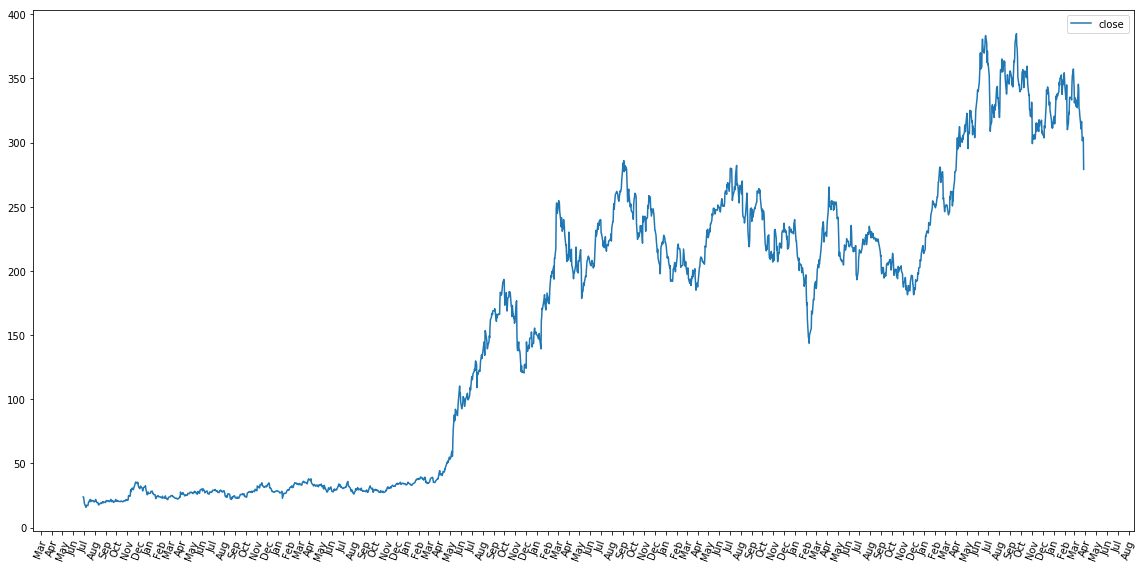

In [29]:
from matplotlib.dates import MonthLocator, date2num, DateFormatter

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(df.index, df.close)

lctr = MonthLocator()  # every month
frmt = DateFormatter('%b')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

ax.legend()

plt.xticks(rotation=70)
plt.tight_layout()
plt.show();

In [30]:
df['1d'] = df.shift(-1)

In [31]:
df.head()

,close,1d
2010-06-29 00:00:00+00:00,23.89,23.83
2010-06-30 00:00:00+00:00,23.83,21.96
2010-07-01 00:00:00+00:00,21.96,19.20
2010-07-02 00:00:00+00:00,19.20,16.11
2010-07-06 00:00:00+00:00,16.11,15.80


In [32]:
for d in range(2, 41):
    col = "%dd" % d
    df[col] = df['close'].shift(-1 * d)
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2010-06-29 00:00:00+00:00,23.89,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,...,17.60,18.32,18.78,19.15,18.77,18.79,19.10,20.13,19.20,19.90
2010-06-30 00:00:00+00:00,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,...,18.32,18.78,19.15,18.77,18.79,19.10,20.13,19.20,19.90,19.75
2010-07-01 00:00:00+00:00,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,...,18.78,19.15,18.77,18.79,19.10,20.13,19.20,19.90,19.75,19.70
2010-07-02 00:00:00+00:00,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,...,19.15,18.77,18.79,19.10,20.13,19.20,19.90,19.75,19.70,19.87
2010-07-06 00:00:00+00:00,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,21.91,...,18.77,18.79,19.10,20.13,19.20,19.90,19.75,19.70,19.87,19.48


In [33]:
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2018-03-21 00:00:00+00:00,316.53,309.10,301.54,304.18,279.18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22 00:00:00+00:00,309.10,301.54,304.18,279.18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-23 00:00:00+00:00,301.54,304.18,279.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 00:00:00+00:00,304.18,279.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-27 00:00:00+00:00,279.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df = df.dropna()

In [35]:
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2018-01-23 00:00:00+00:00,352.79,345.74,337.64,342.85,349.53,345.82,354.42,349.25,343.79,333.70,...,329.10,327.17,345.51,341.84,326.63,325.60,321.35,313.56,310.55,316.53
2018-01-24 00:00:00+00:00,345.74,337.64,342.85,349.53,345.82,354.42,349.25,343.79,333.70,333.63,...,327.17,345.51,341.84,326.63,325.60,321.35,313.56,310.55,316.53,309.10
2018-01-25 00:00:00+00:00,337.64,342.85,349.53,345.82,354.42,349.25,343.79,333.70,333.63,345.00,...,345.51,341.84,326.63,325.60,321.35,313.56,310.55,316.53,309.10,301.54
2018-01-26 00:00:00+00:00,342.85,349.53,345.82,354.42,349.25,343.79,333.70,333.63,345.00,315.36,...,341.84,326.63,325.60,321.35,313.56,310.55,316.53,309.10,301.54,304.18
2018-01-29 00:00:00+00:00,349.53,345.82,354.42,349.25,343.79,333.70,333.63,345.00,315.36,310.11,...,326.63,325.60,321.35,313.56,310.55,316.53,309.10,301.54,304.18,279.18


In [36]:
X = df.iloc[:, :33]
y = df.iloc[:, 33:]
X.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,23d,24d,25d,26d,27d,28d,29d,30d,31d,32d
2010-06-29 00:00:00+00:00,23.89,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,...,20.92,21.95,21.26,20.45,19.59,19.60,19.03,17.90,17.60,18.32
2010-06-30 00:00:00+00:00,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,...,21.95,21.26,20.45,19.59,19.60,19.03,17.90,17.60,18.32,18.78
2010-07-01 00:00:00+00:00,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,...,21.26,20.45,19.59,19.60,19.03,17.90,17.60,18.32,18.78,19.15
2010-07-02 00:00:00+00:00,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,...,20.45,19.59,19.60,19.03,17.90,17.60,18.32,18.78,19.15,18.77
2010-07-06 00:00:00+00:00,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,21.91,...,19.59,19.60,19.03,17.90,17.60,18.32,18.78,19.15,18.77,18.79


In [37]:
y.head()

,33d,34d,35d,36d,37d,38d,39d,40d
2010-06-29 00:00:00+00:00,18.78,19.15,18.77,18.79,19.10,20.13,19.20,19.90
2010-06-30 00:00:00+00:00,19.15,18.77,18.79,19.10,20.13,19.20,19.90,19.75
2010-07-01 00:00:00+00:00,18.77,18.79,19.10,20.13,19.20,19.90,19.75,19.70
2010-07-02 00:00:00+00:00,18.79,19.10,20.13,19.20,19.90,19.75,19.70,19.87
2010-07-06 00:00:00+00:00,19.10,20.13,19.20,19.90,19.75,19.70,19.87,19.48


Sci-Kit Learn Train Test Split [ <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">Link</a> ]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [39]:
X_train.shape

(1145, 33)

In [40]:
X_test.shape

(764, 33)

Sci-Kit Learn Random Forest Regressor [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">Link</a>]

In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto', #change to square(n), log(n) to see what changes
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=16,
    random_state=None,
    verbose=1,
    warm_start=False)
regressor.fit(X_train, y_train)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=16,
           oob_score=True, random_state=None, verbose=1, warm_start=False)

In [42]:
regressor.score(X_test, y_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9926167364740062

In [43]:
regressor.feature_importances_

array([4.36512502e-04, 3.83506783e-04, 3.87413712e-04, 5.51687890e-04,
       1.39579653e-03, 6.46186302e-04, 2.09205806e-03, 4.75823762e-03,
       4.90020748e-03, 1.57662405e-03, 9.11359956e-04, 7.96276293e-04,
       3.52905724e-04, 1.70890449e-04, 3.37360003e-04, 8.39167852e-04,
       9.94776574e-04, 5.14187150e-04, 8.89715147e-04, 6.53425521e-04,
       4.84774920e-04, 4.03235836e-04, 8.11759081e-04, 6.44649778e-04,
       2.22605456e-03, 6.48149284e-04, 7.74901978e-04, 1.29989893e-03,
       1.53327213e-03, 1.46511181e-02, 1.64248848e-02, 6.85430033e-01,
       2.51078972e-01])

In [44]:
y_test.head()

,33d,34d,35d,36d,37d,38d,39d,40d
2015-06-05 00:00:00+00:00,267.20,265.41,253.01,264.82,263.82,266.79,266.15,259.99
2011-10-14 00:00:00+00:00,32.60,33.30,34.42,34.87,34.19,30.89,31.04,30.41
2015-02-18 00:00:00+00:00,203.25,207.67,210.09,210.90,209.78,207.46,207.83,206.70
2017-05-15 00:00:00+00:00,361.61,352.62,327.09,308.89,313.22,316.05,327.22,329.52
2011-06-22 00:00:00+00:00,25.06,23.82,25.30,26.31,26.23,26.10,25.83,24.26


In [45]:
y_predicted = regressor.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [46]:
y_predicted

array([[266.1632 , 262.4768 , 261.2382 , ..., 255.061  , 254.8242 ,
        254.92295],
       [ 32.7813 ,  32.8252 ,  32.69655, ...,  32.2905 ,  32.0046 ,
         31.5648 ],
       [203.49297, 204.1322 , 204.75805, ..., 208.5718 , 209.85205,
        211.46612],
       ...,
       [ 51.92762,  53.80686,  53.83134, ...,  56.90826,  58.58752,
         58.61296],
       [297.0186 , 295.2911 , 297.722  , ..., 298.8009 , 293.909  ,
        295.59935],
       [231.00182, 232.1654 , 233.4683 , ..., 239.82902, 242.94563,
        244.6867 ]])

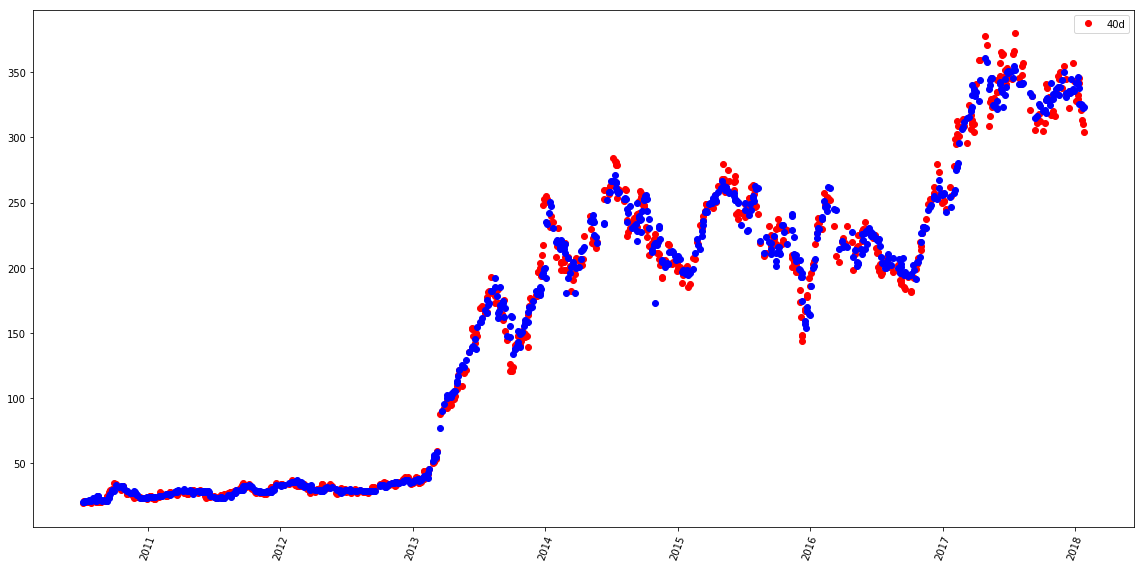

In [47]:
fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(y_test.index, y_test['40d'], 'ro')
ax.plot(y_test.index, y_predicted[:, 7], 'bo')

ax.legend()

plt.xticks(rotation=70)
plt.tight_layout()
plt.show();

In [49]:
!pip install joblib

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [50]:
from joblib import dump
dump(regressor, 'rf_regressor.joblib')

['rf_regressor.joblib']